In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from time import sleep


In [405]:
df = pd.read_csv('diabetes.csv')

In [406]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [407]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(df, columns=df.columns[:-1])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [408]:
def accuracy(matrix):
    total = sum(sum(matrix))
    acc = (matrix[0][0] + matrix[1][1])/total
    return acc

In [409]:
number_list = list(range(515))
accuracy1 = []
for i in tqdm(number_list):
    lm = LogisticRegression()
    lm.fit(X_train.head(i+100), y_train.head(i+100))
    pred = lm.predict(X_test)
    x = accuracy(confusion_matrix(pred, y_test))
    accuracy1.append(x)

  0%|          | 0/515 [00:00<?, ?it/s]

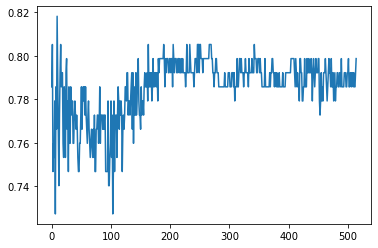

In [410]:
plt.plot(accuracy1)
plt.show()

In [411]:
accuracy_dif = []
for i in range(514):
    accuracy_dif.append(accuracy1[i+1] - accuracy1[i])

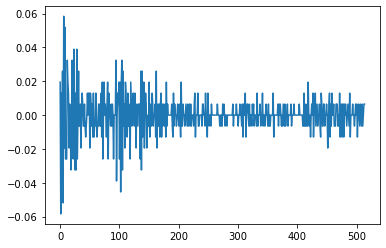

In [412]:
plt.plot(accuracy_dif)